In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

#data files
nfl_stadiums_path = Path("../Data/nfl_stadiums.csv")
nfl_teams_path = Path("../Data/nfl_teams.csv")
spread_values_path = Path("../Data/spreadspoke_scores.csv")

# Read the stadiums, teams, and spread values
nfl_stadiums = pd.read_csv(nfl_stadiums_path, encoding='unicode_escape')
nfl_teams = pd.read_csv(nfl_teams_path, encoding='unicode_escape')
spread_values = pd.read_csv(spread_values_path, encoding='unicode_escape')

# Combine the data into a single DataFrame
team_stadium_merged = pd.merge(nfl_stadiums, nfl_teams,how ='left',on=["stadium_name"])

# Display the data table for preview
team_stadium_merged.head()

,stadium_name,stadium_location_x,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_zipcode,stadium_weather_type,stadium_capacity,stadium_surface,...,stadium_elevation,stadium_location_y,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,65500,Grass,...,367,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,...,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",NaN,indoor,65000,Grass,...,670,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",NaN,moderate,75024,Grass,...,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",NaN,warm,67814,Grass,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning Process - Miranda Melton

In [6]:
#collect column names within the dataframe 
team_stadium_merged.columns

Index(['stadium_name', 'stadium_location_x', 'stadium_open', 'stadium_close',
       'stadium_type', 'stadium_address', 'stadium_weather_station_zipcode',
       'stadium_weather_type', 'stadium_capacity', 'stadium_surface',
       'stadium_weather_station', 'stadium_weather_station_name',
       'stadium_latitude', 'stadium_longitude', 'stadium_azimuthangle',
       'stadium_elevation', 'stadium_location_y', 'team_name',
       'team_name_short', 'team_id', 'team_id_pfr', 'team_conference',
       'team_division', 'team_conference_pre2002', 'team_division_pre2002'],
      dtype='object')

In [7]:
#rename the columns so that they are easier to read
renamed_team_stadium_merged = team_stadium_merged.rename(columns ={"stadium_name":"Stadium Name", 
                                                                   "stadium_location_x":"Stadium Location",
                                                                   "stadium_open":"Year Opened", 
                                                                   "stadium_close":"Year Closed",
                                                                   "stadium_type": "Stadium Type", 
                                                                   "stadium_address": "Address", 
                                                                   "stadium_weather_station_zipcode":"Weather Station Zipcode",
                                                                   "stadium_weather_type": "Climate", 
                                                                   "stadium_capacity": "Stadium Capacity", 
                                                                   "stadium_surface": "Field Surface Type",
                                                                   "stadium_weather_station": "Weather Station",
                                                                   "stadium_weather_station_name": "Weather Station Name",
                                                                   "stadium_latitude": "Latitude", 
                                                                   "stadium_longitude": "Longitude", 
                                                                   "stadium_azimuthangle": "Dome Angle",
                                                                    "stadium_elevation": "Elevation (ft)", 
                                                                   "stadium_location_y":"Stadium Location2", 
                                                                   "team_name":"Team Name",
                                                                   "team_name_short":"Team Short Name", 
                                                                   "team_id":"Team ID", 
                                                                   "team_id_pfr": "Preferred ID", 
                                                                   "team_conference":"Conference (post 2002)",
                                                                "team_division": "Division (post 2002)", 
                                                                   "team_conference_pre2002": "Divison (pre 2002)", 
                                                                   "team_division_pre2002": "Divison (pre 2002)"})
renamed_team_stadium_merged.head()

,Stadium Name,Stadium Location,Year Opened,Year Closed,Stadium Type,Address,Weather Station Zipcode,Climate,Stadium Capacity,Field Surface Type,...,Elevation (ft),Stadium Location2,Team Name,Team Short Name,Team ID,Preferred ID,Conference (post 2002),Division (post 2002),Divison (pre 2002),Divison (pre 2002)
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,65500,Grass,...,367,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,...,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",NaN,indoor,65000,Grass,...,670,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",NaN,moderate,75024,Grass,...,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",NaN,warm,67814,Grass,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Export the renamed, merged data into a csv
renamed_team_stadium_merged.to_csv("new_team_stadium_data.csv",index_label="Index")

# Read saved data
renamed_team_stadium_merged = pd.read_csv("new_team_stadium_data.csv", index_col="Index")

#Display sample of data
renamed_team_stadium_merged.head()

,Stadium Name,Stadium Location,Year Opened,Year Closed,Stadium Type,Address,Weather Station Zipcode,Climate,Stadium Capacity,Field Surface Type,...,Elevation (ft),Stadium Location2,Team Name,Team Short Name,Team ID,Preferred ID,Conference (post 2002),Division (post 2002),Divison (pre 2002),Divison (pre 2002).1
Index,,,,,,,,,,,,,,,,,,,,,
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,65500,Grass,...,367,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,...,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",NaN,indoor,65000,Grass,...,670,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",NaN,moderate,75024,Grass,...,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",NaN,warm,67814,Grass,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Dropping columns that we do not need 
renamed_team_stadium_merged = renamed_team_stadium_merged.drop('Weather Station Zipcode', axis = 1)
renamed_team_stadium_merged = renamed_team_stadium_merged.drop('Weather Station', axis = 1)
renamed_team_stadium_merged = renamed_team_stadium_merged.drop('Weather Station Name', axis = 1)

In [10]:
#renamed_team_stadium_merged.head()

In [11]:
#Adjust the stadium capacity numbers so that they are the same format
renamed_team_stadium_merged['Stadium Capacity'] = renamed_team_stadium_merged['Stadium Capacity'].replace(',', '').astype(float)

In [12]:
#find duplicate rows
duplicate_rows = renamed_team_stadium_merged[renamed_team_stadium_merged.duplicated(subset=['Stadium Name','Latitude','Longitude'])]

In [13]:
#drop the duplicates
no_duplicates = renamed_team_stadium_merged.drop_duplicates()

In [14]:
#some more duplicate clean up
renamed_team_stadium_merged.drop_duplicates(subset=['Stadium Name','Latitude','Longitude'], inplace=True)

In [15]:
#Drop specific rows
renamed_team_stadium_merged = renamed_team_stadium_merged.drop([126,127,128,129,130,131])
renamed_team_stadium_merged

,Stadium Name,Stadium Location,Year Opened,Year Closed,Stadium Type,Address,Climate,Stadium Capacity,Field Surface Type,Latitude,...,Elevation (ft),Stadium Location2,Team Name,Team Short Name,Team ID,Preferred ID,Conference (post 2002),Division (post 2002),Divison (pre 2002),Divison (pre 2002).1
Index,,,,,,,,,,,,,,,,,,,,,
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",cold,65500.0,Grass,40.484600,...,367,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",indoor,72000.0,FieldTurf,29.416944,...,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",indoor,65000.0,Grass,36.090750,...,670,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",moderate,75024.0,Grass,48.218800,...,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",warm,67814.0,Grass,30.323889,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor,"Willow St. & Audubon Blvd., New Orleans, LA 70118",warm,86598.0,Grass,29.942600,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Wembley Stadium,"London, UK",2007.0,NaN,outdoor,"200 Whitton Road, TW2 7BA, London, UK",moderate,75000.0,Grass,51.456111,...,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Wrigley Field,"Chicago, IL",1920.0,1970.0,indoor,"401 Chicago Ave, Minneapolis, MN 55415",indoor,66200.0,FieldTurf,44.973889,...,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Stadium and Team Summaries - Sheena Pickett

## Stadium Summary

In [16]:
#Calculate the total number of stadiums 

stadium_count = renamed_team_stadium_merged["Stadium Name"].nunique()
stadium_count

120

In [28]:
#Print the Names of all of the Stadiums
stadium_location = renamed_team_stadium_merged.set_index("Stadium Name")['Stadium Location']
stadium_location

Stadium Name
Acrisure Stadium          Pittsburgh, PA
Alamo Dome               San Antonio, TX
Allegiant Stadium           Paradise, NV
Allianz Arena            Munich, Germany
Alltel Stadium          Jacksonville, FL
                              ...       
War Memorial Stadium         Buffalo, NY
Wembley Stadium               London, UK
Wrigley Field                Chicago, IL
Yale Bowl                  New Haven, CT
Yankee Stadium                 Bronx, NY
Name: Stadium Location, Length: 120, dtype: object

In [21]:
#Print the Capacities of all of the Stadiums
stadium_capacity = renamed_team_stadium_merged.set_index("Stadium Name")['Stadium Capacity']
stadium_capacity

Stadium Name
Acrisure Stadium        65500.0
Alamo Dome              72000.0
Allegiant Stadium       65000.0
Allianz Arena           75024.0
Alltel Stadium          67814.0
                         ...   
War Memorial Stadium    86598.0
Wembley Stadium         75000.0
Wrigley Field           66200.0
Yale Bowl               63400.0
Yankee Stadium          40350.0
Name: Stadium Capacity, Length: 120, dtype: float64

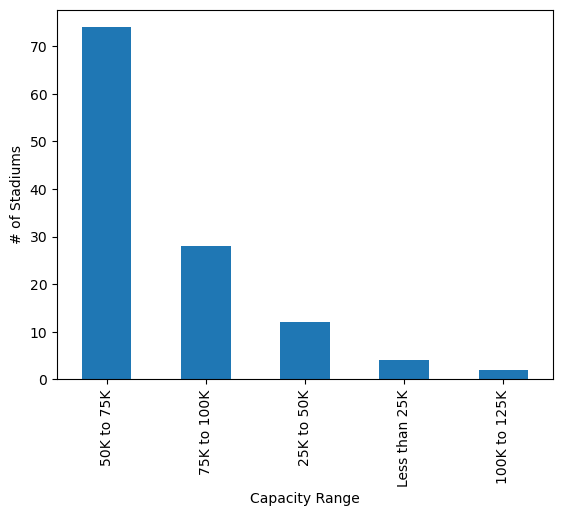

In [36]:
#stadiums by capacity count

#create the bins
bins = [0, 24999, 49999, 74999, 99999, 125000]

#create labels for the bins 
labels = ["Less than 25K", "25K to 50K", "50K to 75K", "75K to 100K", "100K to 125K"]

#slice the data and place it into the bins 
pd.cut(renamed_team_stadium_merged["Stadium Capacity"], bins, labels=labels)

# Place the data series into a new column inside of the DataFrame
renamed_team_stadium_merged["Stadium Capacity Range"] = pd.cut(renamed_team_stadium_merged["Stadium Capacity"], bins, labels=labels)

# Create a GroupBy object based upon "Stadium Capacity"
capacity_groups = renamed_team_stadium_merged.groupby("Stadium Capacity Range")

# Find how many rows fall into each bin
#print(capacity_groups["Stadium Capacity Range"].count())

#create a bar chart for showing the stadium capacity ranges
renamed_team_stadium_merged['Stadium Capacity Range'].value_counts().plot(kind='bar')
plt.xlabel('Capacity Range')
plt.ylabel('# of Stadiums')
plt.show()

In [22]:
#Print the Climate Type of all of the Stadiums
stadium_climate = renamed_team_stadium_merged.set_index("Stadium Name")['Climate']
stadium_climate

Stadium Name
Acrisure Stadium            cold
Alamo Dome                indoor
Allegiant Stadium         indoor
Allianz Arena           moderate
Alltel Stadium              warm
                          ...   
War Memorial Stadium        warm
Wembley Stadium         moderate
Wrigley Field             indoor
Yale Bowl                 indoor
Yankee Stadium          moderate
Name: Climate, Length: 120, dtype: object

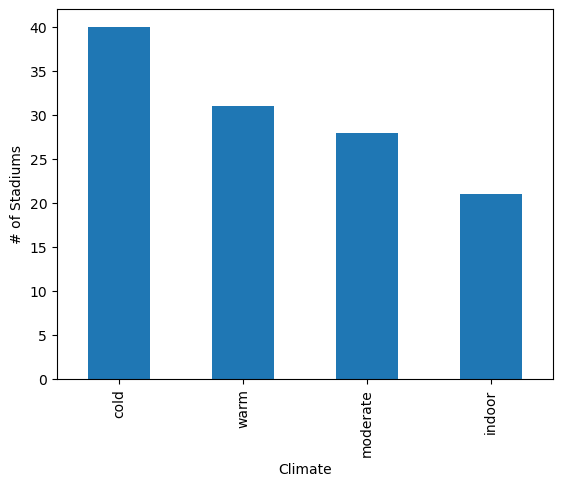

In [38]:
#create a bar chart for showing the stadium surface type
renamed_team_stadium_merged['Climate'].value_counts().plot(kind='bar')
plt.xlabel('Climate')
plt.ylabel('# of Stadiums')
plt.show()

In [23]:
#Print the Type of Grass that Each Stadium Uses
stadium_field = renamed_team_stadium_merged.set_index("Stadium Name")['Field Surface Type']
stadium_field

Stadium Name
Acrisure Stadium            Grass
Alamo Dome              FieldTurf
Allegiant Stadium           Grass
Allianz Arena               Grass
Alltel Stadium              Grass
                          ...    
War Memorial Stadium        Grass
Wembley Stadium             Grass
Wrigley Field           FieldTurf
Yale Bowl                   Grass
Yankee Stadium              Grass
Name: Field Surface Type, Length: 120, dtype: object

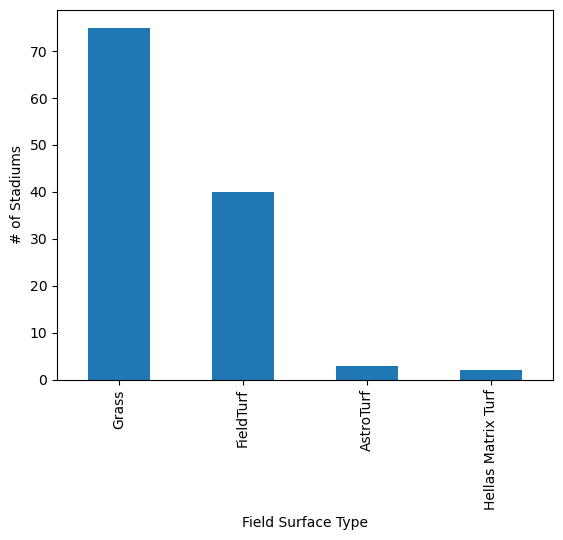

In [37]:
#create a bar chart for showing the stadium surface type
renamed_team_stadium_merged['Field Surface Type'].value_counts().plot(kind='bar')
plt.xlabel('Field Surface Type')
plt.ylabel('# of Stadiums')
plt.show()

In [24]:
#Print the Type of Stadium
stadium_type = renamed_team_stadium_merged.set_index("Stadium Name")['Stadium Type']
stadium_type

Stadium Name
Acrisure Stadium            outdoor
Alamo Dome                   indoor
Allegiant Stadium            indoor
Allianz Arena               outdoor
Alltel Stadium              outdoor
                           ...     
War Memorial Stadium        outdoor
Wembley Stadium             outdoor
Wrigley Field                indoor
Yale Bowl               retractable
Yankee Stadium              outdoor
Name: Stadium Type, Length: 120, dtype: object

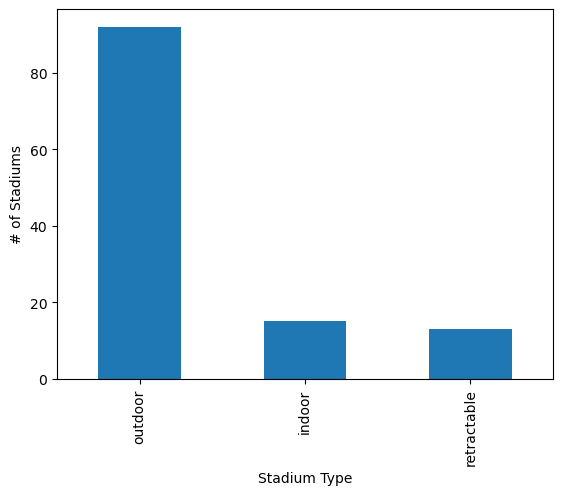

In [39]:
renamed_team_stadium_merged['Stadium Type'].value_counts().plot(kind='bar')
plt.xlabel('Stadium Type')
plt.ylabel('# of Stadiums')
plt.show()

In [25]:
#Print the Address for Each Stadium
stadium_address = renamed_team_stadium_merged.set_index("Stadium Name")['Address']
stadium_address

Stadium Name
Acrisure Stadium                 100 Art Rooney Ave, Pittsburgh, PA 15212
Alamo Dome                          100 Montana St, San Antonio, TX 78203
Allegiant Stadium                  3333 Al Davis Way, Las Vegas, NV 89118
Allianz Arena           Werner-Heisenberg-Allee 25, 80939 München, Ger...
Alltel Stadium                1 Everbank Field Dr, Jacksonville, FL 32202
                                              ...                        
War Memorial Stadium    Willow St. & Audubon Blvd., New Orleans, LA 70118
Wembley Stadium                     200 Whitton Road, TW2 7BA, London, UK
Wrigley Field                      401 Chicago Ave, Minneapolis, MN 55415
Yale Bowl                              1 Cardinals Dr, Glendale, AZ 85305
Yankee Stadium                                        Nashville, TN 37203
Name: Address, Length: 120, dtype: object

In [32]:
# Based on the calculations above, create a data frame 
stadium_summary = {"Location": stadium_location, 
                        "Address": stadium_address,
                       "Capacity": stadium_capacity,
                       "Stadium Type": stadium_type,
                       "Stadium Location Climate":stadium_climate,
                       "Stadium Field Type": stadium_field}

stadium_summary = pd.DataFrame(stadium_summary)

stadium_summary


,Location,Address,Capacity,Stadium Type,Stadium Location Climate,Stadium Field Type
Stadium Name,,,,,,
Acrisure Stadium,"Pittsburgh, PA","100 Art Rooney Ave, Pittsburgh, PA 15212",65500.0,outdoor,cold,Grass
Alamo Dome,"San Antonio, TX","100 Montana St, San Antonio, TX 78203",72000.0,indoor,indoor,FieldTurf
Allegiant Stadium,"Paradise, NV","3333 Al Davis Way, Las Vegas, NV 89118",65000.0,indoor,indoor,Grass
Allianz Arena,"Munich, Germany","Werner-Heisenberg-Allee 25, 80939 München, Ger...",75024.0,outdoor,moderate,Grass
Alltel Stadium,"Jacksonville, FL","1 Everbank Field Dr, Jacksonville, FL 32202",67814.0,outdoor,warm,Grass
...,...,...,...,...,...,...
War Memorial Stadium,"Buffalo, NY","Willow St. & Audubon Blvd., New Orleans, LA 70118",86598.0,outdoor,warm,Grass
Wembley Stadium,"London, UK","200 Whitton Road, TW2 7BA, London, UK",75000.0,outdoor,moderate,Grass
Wrigley Field,"Chicago, IL","401 Chicago Ave, Minneapolis, MN 55415",66200.0,indoor,indoor,FieldTurf
